In [17]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import  *
from keras.optimizers import *

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
parent_directory = os.getcwd() + '/drive/My Drive/Colab Notebooks/TwoStepper'
classifier_directory = parent_directory + '/classifier'
pathway_to_clips = classifier_directory + '/movie_clips'
pathway_to_frames = classifier_directory + '/frames'
pathway_to_skeletons = classifier_directory + '/skeletons'




train_data = classifier_directory + '/train'
test_data = classifier_directory + '/test'

def listdir_nohidden(directory):
    filelist = os.listdir(directory)
    return [x for x in filelist
            if not (x.startswith('.'))]

def move_label(img): #ohl stands for one hot label
    label = img.split('.')[0]
    if label == 'turn':
        ohl = np.array([1,0])
    elif label == 'cuddle':
        ohl = np.array([0,1])
    # elif label == 'shadow':
    #     ohl = np.array([0,0,1])
    return ohl

def train_data_with_label():
    train_images = []
    for ii in tqdm(listdir_nohidden(train_data)):
        path = os.path.join(train_data, ii)
        img = np.genfromtxt(path, delimiter=',') #cv2.imread(path)
        train_images.append([np.array(img), move_label(ii)])
    shuffle(train_images)
    return train_images

def test_data_with_label():
    test_images = []
    for ii in tqdm(listdir_nohidden(test_data)):
        path = os.path.join(test_data, ii)
        img = np.genfromtxt(path, delimiter=',') 
        test_images.append([np.array(img), move_label(ii)])
    shuffle(test_images)
    return test_images
                         
                         
                         
training_images = train_data_with_label()
testing_images = test_data_with_label()


tr_img_data = np.array([ii[0] for ii in training_images]).reshape(-1,36,60,1)
tr_lbl_data = np.array([ii[1] for ii in training_images])

tst_img_data = np.array([ii[0] for ii in testing_images]).reshape(-1,36,60,1)
tst_lbl_data = np.array([ii[1] for ii in testing_images])
                         
                         
                         

100%|██████████| 14/14 [00:00<00:00, 312.71it/s]


In [31]:
model = Sequential()

model.add(InputLayer(input_shape = [36,60,1]))

model.add(Conv2D(filters=60, kernel_size=[36,4],strides=2,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=4, padding='same'))

model.add(Conv2D(filters=60, kernel_size=[36,4],strides=2,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=4, padding='same'))

model.add(Conv2D(filters=60, kernel_size=[36,4],strides=2,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=4, padding='same'))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2,activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x=tr_img_data,y=tr_lbl_data,epochs=50,batch_size=100)
model.summary()

Epoch 1/50
102/102 [==============================] - 1s 7ms/step - loss: 0.6892 - acc: 0.9314
Epoch 2/50
102/102 [==============================] - 0s 253us/step - loss: 0.5905 - acc: 1.0000
Epoch 3/50
102/102 [==============================] - 0s 243us/step - loss: 0.3480 - acc: 1.0000
Epoch 4/50
102/102 [==============================] - 0s 251us/step - loss: 0.0729 - acc: 1.0000
Epoch 5/50
102/102 [==============================] - 0s 233us/step - loss: 0.0075 - acc: 1.0000
Epoch 6/50
102/102 [==============================] - 0s 188us/step - loss: 5.9000e-04 - acc: 1.0000
Epoch 7/50
102/102 [==============================] - 0s 210us/step - loss: 3.1122e-04 - acc: 1.0000
Epoch 8/50
102/102 [==============================] - 0s 194us/step - loss: 5.8152e-06 - acc: 1.0000
Epoch 9/50
102/102 [==============================] - 0s 198us/step - loss: 1.5100e-06 - acc: 1.0000
Epoch 10/50
102/102 [==============================] - 0s 190us/step - loss: 7.0709e-07 - acc: 1.0000
Epoch 11/50

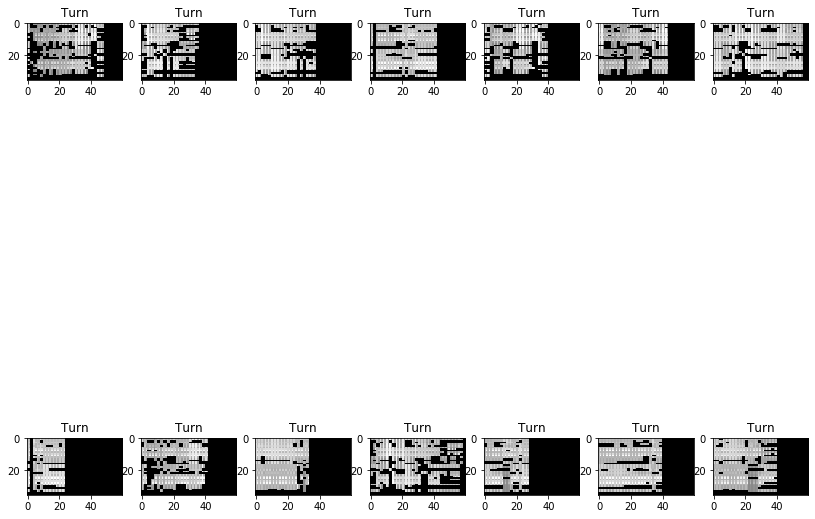

In [37]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images[0:14]):
  y = fig.add_subplot(2,7, cnt+1)
  img = data[0]
  data = img.reshape(1,36,60,1)
  model_out = model.predict([data])

  if np.argmax(model_out) == 0:
    str_label='Turn'
  else:
      str_label = 'Not a Turn'

  y.imshow(img, cmap='gray')
  plt.title(str_label)
